[Reference](https://kuleafenu.medium.com/how-to-convert-your-jupyter-notebook-into-an-app-57adfb7a4d37)

In [1]:
!pip3 install -U datapane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.2/502.2 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.

In [2]:
#import datapane and other needed libraries.
import datapane as dp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import titanic dataset.
df = sns.load_dataset("titanic")

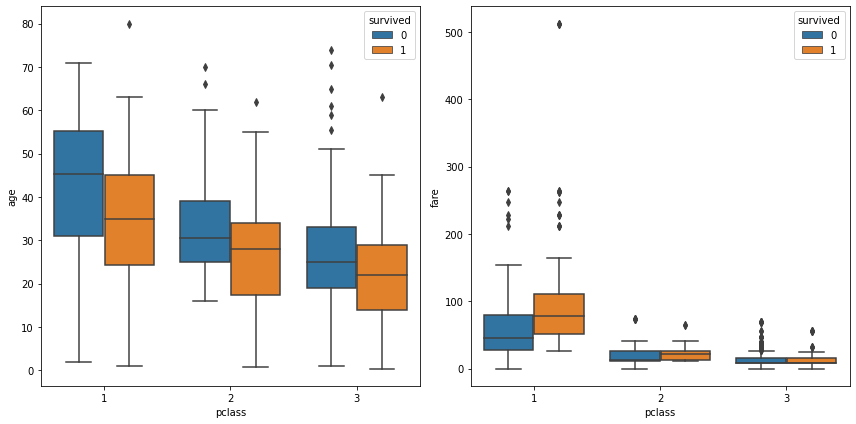

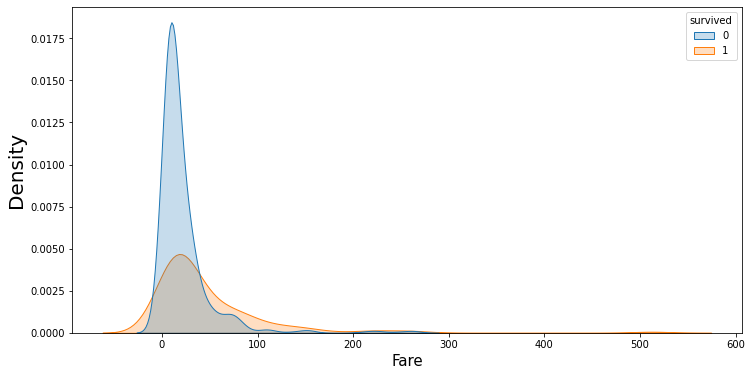

In [4]:
# Our first plot
fig1,ax = plt.subplots(ncols=2,figsize=(12,6))
sns.boxplot(x='pclass',y='age',data=df,ax=ax[0],hue='survived')
sns.boxplot(x='pclass',y='fare',data=df,ax=ax[1],hue='survived')
plt.tight_layout()

# Our second plot
fig2,ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=df, x='fare', shade=True, hue='survived')
ax.set_xlabel('Fare',fontdict={'fontsize':15})
ax.set_ylabel('Density',fontdict={'fontsize':20});

In [5]:
# Our markdown text.
md = """
**Some observations**

- The maximum and mininum age for `Pclass 1 > Pclass 2 > Pclass 3.` This is understandable because it takes years to accumulate wealth.

- The average age of those that survived in all the classes is lower than those that did not survive.

- Passengers that survived in the Pclass 1 paid the highest fare. Which concluded the higher your fare in the pclass 1 the higher your rate of survival.

"""

In [6]:
# Let's wrap our figure, and dataframes in blocks and create our app with dp.App.
app = dp.App(
    dp.Plot(fig1, caption="Pclass VS Age Vs Fare"),
    dp.Plot(fig2, caption="Kernel Density Estimation of Fare"),
    dp.Text(md),
    dp.DataTable(df, caption="Titanic Dataset")
)


# Save your shearable html file to local directory. With option `open=true` your app will be opened in your browser.
app.save("titanic-analysis-report.html", open="true")

App saved to ./titanic-analysis-report.html


In [7]:
# !datapane login


Opening login page.. please login via this page and return to the terminal

If the page didn't open, use the link below
https://cloud.datapane.com/accounts/api-login-token-accept?login_token=612f00e0-6b97-422f-a5e5-e8c357cfa6c9
-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

In [10]:
# # Lets wrap our figure, and dataframes in blocks and create our app with dp.App.
# app = dp.App(
#     dp.Plot(fig1, caption="Pclass VS Age Vs Fare"),
#     dp.Plot(fig2, caption="Kernel Density Estimation of Fare"),
#     dp.Text(md),
#     dp.DataTable(df, caption="Titanic Dataset")
# )

# # Generate a shareable link.
# app.upload("titanic-analysis-report.html", open="true")